# DCT (Discrete Cosine Transform)
### I. Rough Computation 
$F(u,v)=\alpha (u)\alpha (v) \Sigma^{N}_{i=0} \Sigma^{N}_{j=0} \{cos(\frac{(2i+1)u\pi}{2N})*cos(\frac{(2j+1)v\pi}{2N})\}$. 

$
\alpha(k)=\begin{cases}
 \ \sqrt{\frac{1}{N}},&k=0\\
\ \sqrt{\frac{2}{N}},& k>0 \\
\end{cases}
$

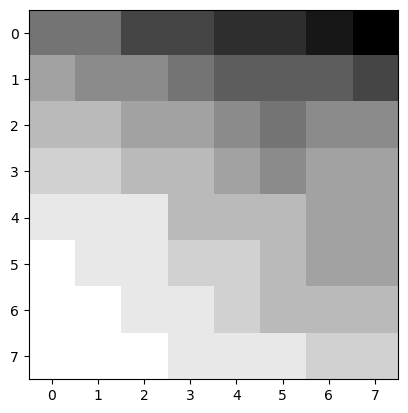

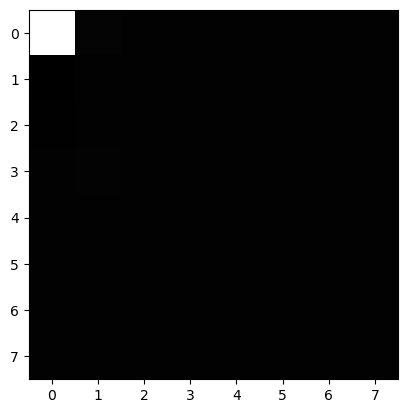

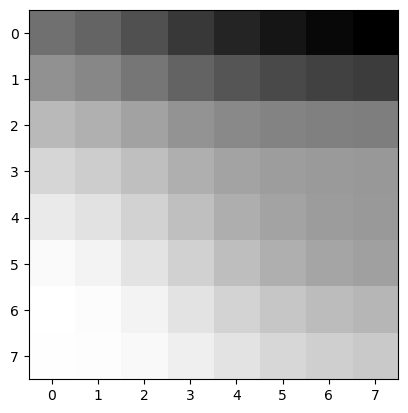

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sp

#import image
img=cv2.imread('Images/T1.jpeg')
img=np.array(img)
height,width,depth=img.shape
img_gray=np.zeros((height,width),dtype=np.uint8)
for i in range(height):
    for j in range(width):
        img_gray[i,j]=(int(img[i,j,0])+int(img[i,j,1])+int(img[i,j,2]))/3
img_dct=img_gray[20:28,50:58]
plt.imshow(img_dct,cmap='gray')
plt.show()

#perform 2D-DCT
def alpha(u,N):
    if u==0: return 1/np.sqrt(N)
    elif u>0: return np.sqrt(2/N)
    else: return 0

def f_dct(img):
    height,width=img.shape[:2]
    N=height
    img_aft_dct=np.zeros((height,width))
    for u in range(height):
        for v in range(width):
            sum=0
            for i in range(height):
                for j in range(width):
                    sum+=float(img[i,j])*np.cos(((2*i+1)*u*np.pi)/(2*N))*np.cos(((2*j+1)*v*np.pi)/(2*N))
            img_aft_dct[u,v]=alpha(u,N)*alpha(v,N)*sum
    return img_aft_dct

img_aft_dct=f_dct(img_dct)
# print("With Formular:\n")
# print(img_aft_dct)
# img_after_dct_sp = sp.dct(sp.dct(img_dct.T, norm='ortho').T, norm='ortho')
# print("With scipy:\n")
# print(img_after_dct_sp)
plt.imshow(img_aft_dct,cmap='gray')
plt.show()
#filter
for i in range(8):
    for j in range(8):
        if i+j>=5:
            img_aft_dct[i,j]=0
img_recover=sp.idct(sp.idct(img_aft_dct.T, norm='ortho').T, norm='ortho')
plt.imshow(img_recover,cmap='gray')
plt.show()

## II. DCT Matrix
DCT Matrix T(u,i) =
$
\begin{cases}
\ \sqrt{\frac{1}{N}},&u=0\\
\ \sqrt{\frac{2}{N}}cos(\frac{(2i+1)u\pi}{2N}),&u>0\\
\end{cases}
$. 

Therefore, $F=T \cdot f \cdot T^T$, f(i,j) is pixels of image

## III. Inverse DCT
Due to the DCT Matrix is orthogenal matrix, which means $T^{-1}=T^T$,  

Therefore, $f=T^{-1}\cdot F\cdot T$

[[198 198 196 196 195 195 194 193]
 [200 199 199 198 197 197 197 196]
 [201 201 200 200 199 198 199 199]
 [202 202 201 201 200 199 200 200]
 [203 203 203 201 201 201 200 200]
 [204 203 203 202 202 201 200 200]
 [204 204 203 203 202 201 201 201]
 [204 204 204 203 203 203 202 202]]


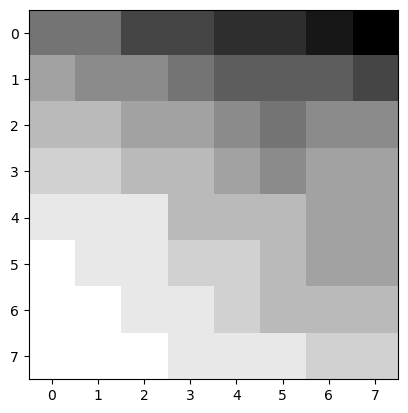

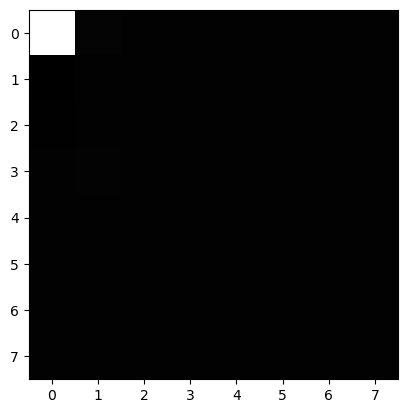

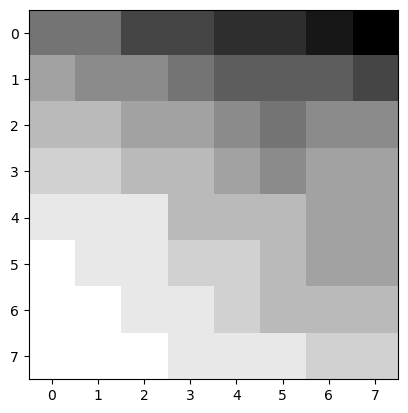

In [32]:
print(img_dct)
plt.imshow(img_dct,cmap='gray')
plt.show()
N=8
T=np.zeros((N,N))
for u in range(8):
    for i in range(8):
        T[u,i]=np.sqrt(2/N)*np.cos(((2*i+1)*u*np.pi)/(2*N))
T[0,:]=1/np.sqrt(N)
img_dct_m=T.dot(img_dct).dot(T.T)
plt.imshow(img_dct_m,cmap='gray')
plt.show()
#proove T is orthogonal matrix  
plt.imshow((T.T).dot(img_dct_m).dot(T),cmap='gray')
plt.show()

## IV. JEPG Compression simulization. 

### Compression

In [33]:
print(img_dct)
def dct_trans(img,bool=True):
    H,W=img.shape
    if (H!=W): return None
    else: N=H
    T=np.zeros((N,N))
    for u in range(N):
        for i in range(N):
            T[u,i]=alpha(u,N)*np.cos(((2*i+1)*u*np.pi)/(2*N))
    if (bool): img_dct=T.dot(img).dot(T.T)
    else: img_dct=(T.T).dot(img).dot(T)
    return img_dct
    
img_jepg=dct_trans(img_dct,1)
print(img_jepg)

Q50 = np.array([
 [16, 11, 10, 16, 24, 40, 51, 61],
 [12, 12, 14, 19, 26, 58, 60, 55],
 [14, 13, 16, 24, 40, 57, 69, 56],
 [14, 17, 22, 29, 51, 87, 80, 62],
 [18, 22, 37, 56, 68,109,103, 77],
 [24, 35, 55, 64, 81,104,113, 92],
 [49, 64, 78, 87,103,121,120,101],
 [72, 92, 95, 98,112,100,103, 99]
], dtype=np.int32)

img_jepg_bar=np.round(img_jepg/Q50)
print(img_jepg_bar)

[[198 198 196 196 195 195 194 193]
 [200 199 199 198 197 197 197 196]
 [201 201 200 200 199 198 199 199]
 [202 202 201 201 200 199 200 200]
 [203 203 203 201 201 201 200 200]
 [204 203 203 202 202 201 200 200]
 [204 204 203 203 202 201 201 201]
 [204 204 204 203 203 203 202 202]]
[[ 1.60262500e+03  8.96857626e+00  8.56230020e-01  3.19963086e-02
  -1.25000000e-01  3.20633162e-02 -2.19363062e-01 -9.38130460e-03]
 [-1.77034647e+01  7.68365502e-01  6.43931177e-01  2.53941266e-01
  -1.90506633e-01  6.09604297e-01 -6.48459934e-01 -3.56894635e-01]
 [-5.08614513e+00  5.00965207e-01 -5.15165043e-01  8.18488143e-01
  -2.98619396e-01  7.26874364e-02  3.66116524e-02 -4.97457003e-01]
 [-3.76919707e+00  1.85218100e+00 -5.34785920e-01  9.33535376e-01
  -2.25660765e-01 -3.09843172e-01  5.22909665e-01 -6.37082463e-02]
 [-8.75000000e-01 -2.57306692e-01 -6.76495125e-02  2.63499958e-01
  -6.25000000e-01 -4.87551146e-01  1.63320371e-01 -2.53288212e-01]
 [-1.30069764e+00  1.67261637e-01  3.13300068e-01 -3.8

### Recover

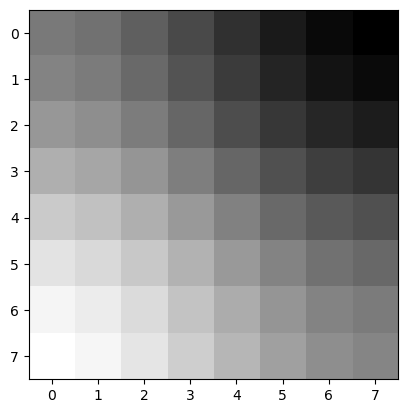

[[199.82662002 199.53626919 198.9997708  198.29880188 197.54007859
  196.83910966 196.30261128 196.01226044]
 [200.14336638 199.85301555 199.31651716 198.61554824 197.85682495
  197.15585603 196.61935764 196.32900681]
 [200.72863735 200.43828652 199.90178813 199.20081921 198.44209592
  197.74112699 197.20462861 196.91427778]
 [201.49333072 201.20297988 200.6664815  199.96551258 199.20678928
  198.50582036 197.96932198 197.67897114]
 [202.32102886 202.03067802 201.49417964 200.79321072 200.03448742
  199.3335185  198.79702012 198.50666928]
 [203.08572222 202.79537139 202.25887301 201.55790408 200.79918079
  200.09821187 199.56171348 199.27136265]
 [203.67099319 203.38064236 202.84414397 202.14317505 201.38445176
  200.68348284 200.14698445 199.85663362]
 [203.98773956 203.69738872 203.16089034 202.45992141 201.70119812
  201.0002292  200.46373081 200.17337998]]


In [34]:
img_jepg_r=img_jepg_bar*Q50
img_recover=dct_trans(img_jepg_r,0)
plt.imshow(img_recover,cmap='gray')
plt.show()
print(img_recover)

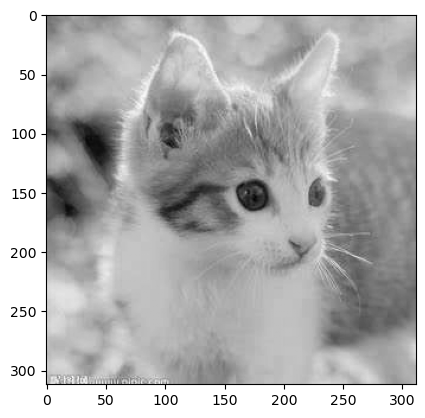

(312, 312)


In [35]:
img_gray=img_gray[0:312,0:312]
plt.imshow(img_gray,cmap='gray')
plt.show()
print(img_gray.shape)

### Whole Process

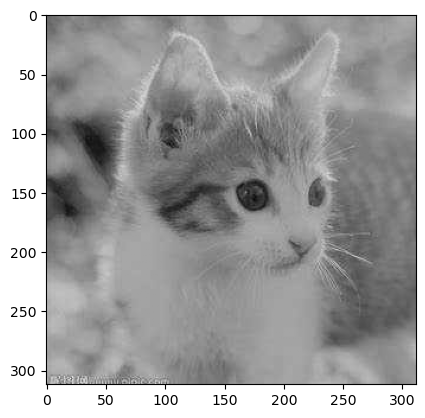

In [36]:
def split(img,block_size=8):
    H,W=img.shape
    if (H!=W): return None
    block_num=H//block_size
    block_list=[]
    for n in range(block_num):
        for m in range(block_num):
            block=img[n*block_size:(n+1)*block_size,m*block_size:(m+1)*block_size]
            block_list.append(block)
    return block_list

def merge(block_list,block_size=8):
    block_num=int(np.sqrt(len(block_list)))
    H=block_num*block_size
    W=H
    img=np.zeros((H,W))
    for n in range(block_num):
        for m in range(block_num):
            img[n*block_size:(n+1)*block_size,m*block_size:(m+1)*block_size]=block_list[n*block_num+m]
    return img

img_list=split(img_gray,8)
new_list = []
for block in img_list:
    block = dct_trans(block, 1)
    block = np.round(block/Q50)
    block = block * Q50
    block = dct_trans(block, 0)
    new_list.append(block)

img_jpeg = merge(new_list, 8)

plt.imshow(img_jpeg,cmap='gray')
plt.show()

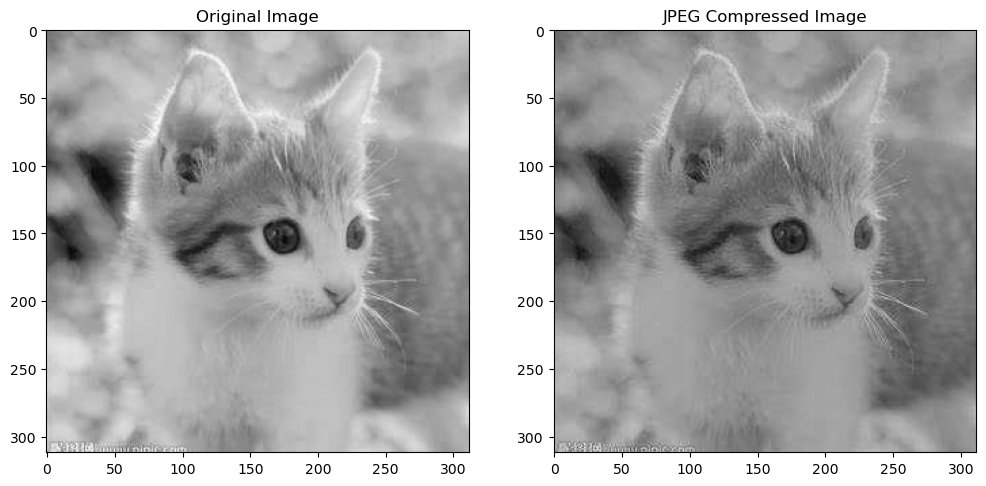

In [37]:
#compare with original
figure=plt.figure(figsize=(12,6))
ax1=figure.add_subplot(1,2,1)
ax1.set_title('Original Image')
ax1.imshow(img_gray,cmap='gray')
ax2=figure.add_subplot(1,2,2)
ax2.set_title('JPEG Compressed Image')
ax2.imshow(img_jpeg,cmap='gray')
plt.show()

### ZigZag Scan and Encoding


In [ ]:
def zigzag_scan(matrix):
    n=matrix.shape[0]
    result=[]
    n_diag=2*n-1
    for d in range(n_diag):
        if d%2==0:
            for i in range(d+1):
                j=d-i
                if j<n and i<n :
                    result.append(matrix[j,i])
        else:
            for i in range(d+1):
                j=d-i
                if j<n and i<n :
                    result.append(matrix[i,j])
    return np.array(result)

test_matrix = np.array([
    [ 1,  2,  3,  4,  5,  6,  7,  8],
    [ 9, 10, 11, 12, 13, 14, 15, 16],
    [17, 18, 19, 20, 21, 22, 23, 24],
    [25, 26, 27, 28, 29, 30, 31, 32],
    [33, 34, 35, 36, 37, 38, 39, 40],
    [41, 42, 43, 44, 45, 46, 47, 48],
    [49, 50, 51, 52, 53, 54, 55, 56],
    [57, 58, 59, 60, 61, 62, 63, 64]
])
for i in range(5,8):
    for j in range(5,8):
        test_matrix[i,j] = 0

test_zz=zigzag_scan(test_matrix)
print(zigzag_scan(test_matrix))

def RLE_encode(arr):
    result=[]
    result.append(int(arr[0]))
    n=arr.size
    counter=1
    zero=0
    while counter<n :
        if arr[counter]==0:
            zero+=1
            counter+=1
        else:
            result.append((zero,int(arr[counter])))
            counter+=1
            zero=0
    if zero!=0: result.append((0,0))
    return result

test_rle=RLE_encode(test_zz)
print(test_rle)


[ 1  2  9 17 10  3  4 11 18 25 33 26 19 12  5  6 13 20 27 34 41 49 42 35
 28 21 14  7  8 15 22 29 36 43 50 57 58 51 44 37 30 23 16 24 31 38 45 52
 59 60 53  0 39 32 40  0  0 61  0  0  0  0  0  0]
[np.int64(1), (0, np.int64(2)), (0, np.int64(9)), (0, np.int64(17)), (0, np.int64(10)), (0, np.int64(3)), (0, np.int64(4)), (0, np.int64(11)), (0, np.int64(18)), (0, np.int64(25)), (0, np.int64(33)), (0, np.int64(26)), (0, np.int64(19)), (0, np.int64(12)), (0, np.int64(5)), (0, np.int64(6)), (0, np.int64(13)), (0, np.int64(20)), (0, np.int64(27)), (0, np.int64(34)), (0, np.int64(41)), (0, np.int64(49)), (0, np.int64(42)), (0, np.int64(35)), (0, np.int64(28)), (0, np.int64(21)), (0, np.int64(14)), (0, np.int64(7)), (0, np.int64(8)), (0, np.int64(15)), (0, np.int64(22)), (0, np.int64(29)), (0, np.int64(36)), (0, np.int64(43)), (0, np.int64(50)), (0, np.int64(57)), (0, np.int64(58)), (0, np.int64(51)), (0, np.int64(44)), (0, np.int64(37)), (0, np.int64(30)), (0, np.int64(23)), (0, np.int64(16)), 